In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

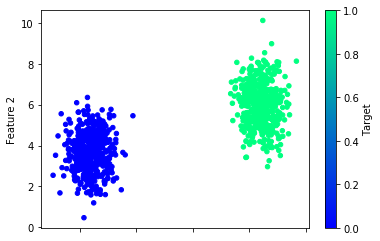

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
#Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

As we learned earlier, we can add layers to our Sequential model using Keras’ Dense class. For our first layer, we need to define a few parameters:
The input_dim parameter indicates how many inputs will be in the model (in this case two).
The units parameter indicates how many neurons we want in the hidden layer (in this case one).
The activation parameter indicates which activation function to use. We’ll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

# Define Input Layer

In [6]:
# Add our first Dense layer, including the input layer
# layer is dense, unit is # of nuerons in hidden layer, 
# activation=Relu - identify and train non-linear dataset
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Once again, we’ll use the Dense class to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output.

# Define Output Layer

In [7]:
# Add the output layer that uses a probability activation function
# sigmoid activation to produce output probability
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

check the nn_model function structure

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


he optimization function shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The loss metric is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input. To enhance the performance of our classification neural network, we’ll use the adam optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features. As for the loss function, we’ll use binary_crossentropy, which is specifically designed to evaluate a binary classification model.

on metric, which measures the quality of the machine learning model. There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE). We use accuracy for classification models and mse for regression models. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.

In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 582us/sample - loss: 1.4041 - accuracy: 0.0000e+00
Epoch 2/100
750/750 [==============================] - 0s 29us/sample - loss: 1.3481 - accuracy: 0.0000e+00
Epoch 3/100
750/750 [==============================] - 0s 27us/sample - loss: 1.2938 - accuracy: 0.0000e+00
Epoch 4/100
750/750 [==============================] - 0s 29us/sample - loss: 1.2443 - accuracy: 0.0000e+00
Epoch 5/100
750/750 [==============================] - 0s 28us/sample - loss: 1.1976 - accuracy: 0.0000e+00
Epoch 6/100
750/750 [==============================] - 0s 27us/sample - loss: 1.1540 - accuracy: 0.0013
Epoch 7/100
750/750 [==============================] - 0s 29us/sample - loss: 1.1143 - accuracy: 0.0013
Epoch 8/100
750/750 [==============================] - 0s 28us/sample - loss: 1.0772 - accuracy: 0.0013
Epoch 9/100
750/750 [==============================] - 0s 32us/sample - loss: 1.0424 - accuracy: 0.0027
Epoch 10/100
750/750 [

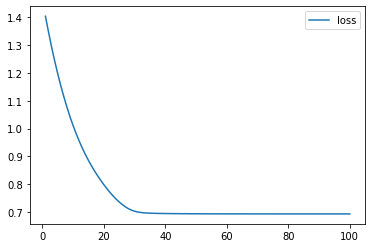

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

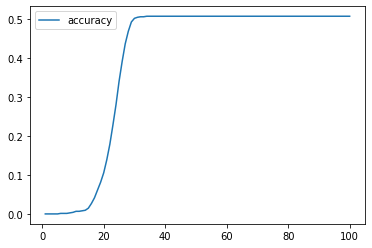

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.6941 - accuracy: 0.4720
Loss: 0.6941036081314087, Accuracy: 0.47200000286102295


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

# New Non linear moon shaped data using Scikit-learns - New Model

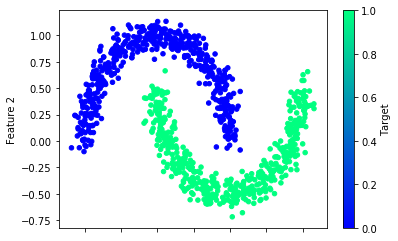

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 236us/sample - loss: 0.6947 - accuracy: 0.4747
Epoch 2/100
750/750 [==============================] - 0s 24us/sample - loss: 0.6938 - accuracy: 0.4973
Epoch 3/100
750/750 [==============================] - 0s 40us/sample - loss: 0.6929 - accuracy: 0.5147
Epoch 4/100
750/750 [==============================] - 0s 39us/sample - loss: 0.6924 - accuracy: 0.5253
Epoch 5/100
750/750 [==============================] - 0s 35us/sample - loss: 0.6921 - accuracy: 0.5293
Epoch 6/100
750/750 [==============================] - 0s 27us/sample - loss: 0.6920 - accuracy: 0.5293
Epoch 7/100
750/750 [==============================] - 0s 28us/sample - loss: 0.6919 - accuracy: 0.5293
Epoch 8/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6918 - accuracy: 0.5307
Epoch 9/100
750/750 [==============================] - 0s 27us/sample - loss: 0.6917 - accuracy: 0.5307
Epoch 10/100
750/750 [====================

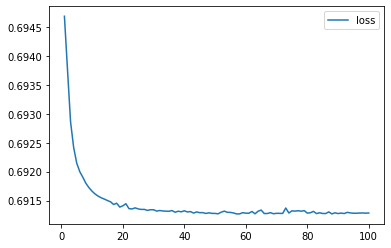

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

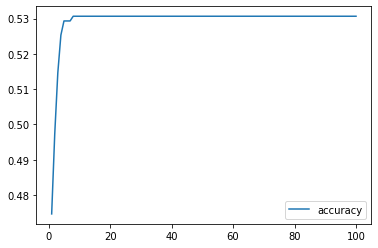

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

# Create the Connective Tissue, the Multiple-Neuron Neural Network

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 493us/sample - loss: 0.7550 - accuracy: 0.4693
Epoch 2/100
750/750 [==============================] - 0s 31us/sample - loss: 0.7346 - accuracy: 0.4693
Epoch 3/100
750/750 [==============================] - 0s 28us/sample - loss: 0.7192 - accuracy: 0.4693
Epoch 4/100
750/750 [==============================] - 0s 31us/sample - loss: 0.7083 - accuracy: 0.4373
Epoch 5/100
750/750 [==============================] - 0s 31us/sample - loss: 0.7002 - accuracy: 0.3800
Epoch 6/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6946 - accuracy: 0.4373
Epoch 7/100
750/750 [==============================] - 0s 31us/sample - loss: 0.6909 - accuracy: 0.5867
Epoch 8/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6872 - accuracy: 0.6880
Epoch 9/100
750/750 [==============================] - 0s 31us/sample - loss: 0.6834 - accuracy: 0.8293
Epoch 10/100
750/750 [====================

Looking at the training metrics of our new model, as we increase the number of neurons within the hidden layer, the classification accuracy improves. You may have noticed that adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.